# 範例

根據以下的參考點，嘗試做透視變換

```
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

img = cv2.imread('../data/lena.png')

## 透視轉換

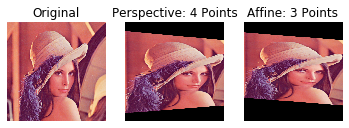

In [2]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)

M = cv2.getPerspectiveTransform(point1, point2)
A_M = cv2.getAffineTransform(point1[:3,:], point2[:3,:])
# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h))
img_affine = cv2.warpAffine(img, A_M, (w, h))

# 組合 + 顯示圖片
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Perspective: 4 Points')
plt.imshow(cv2.cvtColor(img_perspective, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Affine: 3 Points')
plt.imshow(cv2.cvtColor(img_affine, cv2.COLOR_BGR2RGB))

# while True:
#     cv2.imshow('perspective transform', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break